# a)
Realizar a leitura do arquivo de entrada, armazenando os dados dos contratos (0,5 ponto) (Data de entrega: 16/06):
    1. Em um vetor de objetos do tipo contrato; e
    2. Em uma matriz, indexada pelo fornecedor, pelo mês de início e pelo mês de fim do contrato, onde cada elemento armazena o valor do contrato respectivo.

## Import do código desenvolvido para o trabalho

In [ ]:
include("Algoritmos/Ordenacao.jl")
include("Algoritmos/Organizacao_Estrutural.jl")
include("Algoritmos/Inicializacao.jl")
include("Algoritmos/Saida.jl")
include("Algoritmos/Grafico.jl")
using BenchmarkTools, Juno, Plots, DataFrames

## Inicialização das variáveis

In [13]:
entrada_matricial, entrada_vetorizada, m, n =
    Inicializacao.inicializar_variaveis("Dados/entrada.txt");

## Arquivo de entrada sem ordenação

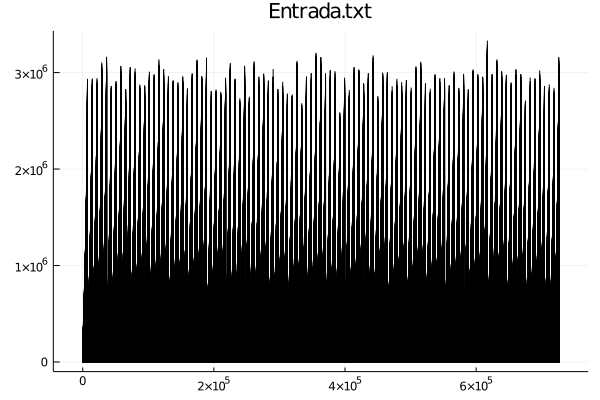

In [7]:
df = DataFrame(entrada_vetorizada)
plot(
        [1:1:size(df, 1);],
        df[!, 4],
        seriestype = :bar,
        label = false,
        title = "Entrada.txt",
        fmt = :png
    )

# b) 
Explicar qual das duas maneiras de armazenamento dos dados é mais eficiente, em relação ao consumo de memória, tanto em termos assintóticos quanto em termos de absolutos. (Data de entrega: 18/06) (0,5 ponto)

In [42]:
"""
O número de posições da entrada vetorizada é 4*m*n*(n+1)/2, onde 4 é o número de dados por contrato 
e o restante da expressão representa o número de linhas do arquivo. 
A estrutura é densa, todas as posições são ocupadas, pois todos os dados do contrato são guardados nessa estrutura
""" 
n_posicoes_entrada_vetorizada = 4*length(entrada_vetorizada) 
print(n_posicoes_entrada_vetorizada)

"""
A entrada matricial é um vetor de 3 dimensões, onde cada dimensão é representada pela empresa,
mes_inicial e mes_final do contrato, e apenas o valor do contrato é guardado nessa estrutura.

entrada_matricial[empresa, mes_inicial, mes_final] = valor

entrada_matricial[100, 120, 120]

A estrutura é esparsa, pois reserva espaços para contratos que não existem. No total são reservadas
m*n^2 posições de memória.
""" 

n_posicoes_entrada_matricial = length(entrada_matricial)


2904000

1440000

# c) 
Implementar o método de ordenação Insertion Sort para ordenar o vetor de objetos do tipo contrato. Criar um clone do vetor (simplesmente para não alterar a organização original dos dados) e aplicar o método de ordenação, exibindo ao final o tempo total de execução da ordenação. (Data de entrega: 16/06) (1,0 ponto)


### Sem pre-organização dos dados de entrada

In [20]:
tempo_insertion_sort_1 = @time begin ordenado_insertion_sort = Ordenacao.insertionsort(entrada_vetorizada); end


470.258960 seconds (2 allocations: 22.156 MiB)


726000-element Array{Tuple{Int64,Int64,Int64,Float64},1}:
 (18, 35, 35, 10000.37)
 (46, 8, 8, 10002.58)
 (25, 109, 109, 10003.88)
 (22, 51, 51, 10015.82)
 (13, 80, 80, 10031.34)
 (95, 39, 39, 10043.6)
 (97, 15, 15, 10044.78)
 (17, 112, 112, 10049.84)
 (30, 117, 117, 10053.87)
 (10, 18, 18, 10061.77)
 (46, 34, 34, 10069.98)
 (22, 106, 106, 10086.41)
 (43, 101, 101, 10091.86)
 ⋮
 (85, 3, 118, 3.21781847e6)
 (85, 4, 119, 3.22114266e6)
 (85, 3, 119, 3.23044901e6)
 (85, 2, 118, 3.23272162e6)
 (85, 2, 119, 3.234163e6)
 (85, 1, 118, 3.23484933e6)
 (85, 5, 120, 3.24565113e6)
 (85, 1, 119, 3.25266925e6)
 (85, 4, 120, 3.26628814e6)
 (85, 3, 120, 3.27042195e6)
 (85, 2, 120, 3.29288832e6)
 (85, 1, 120, 3.33263894e6)

### Com pré-organização dos dados de entrada

In [19]:
tempo_insertion_sort_2 = @time begin ordenado_insertion_sort = Ordenacao.insertionsort(entrada_vetorial_pre_organizada); end

 18.252815 seconds (2 allocations: 22.156 MiB)


726000-element Array{Tuple{Int64,Int64,Int64,Float64},1}:
 (18, 35, 35, 10000.37)
 (46, 8, 8, 10002.58)
 (25, 109, 109, 10003.88)
 (22, 51, 51, 10015.82)
 (13, 80, 80, 10031.34)
 (95, 39, 39, 10043.6)
 (97, 15, 15, 10044.78)
 (17, 112, 112, 10049.84)
 (30, 117, 117, 10053.87)
 (10, 18, 18, 10061.77)
 (46, 34, 34, 10069.98)
 (22, 106, 106, 10086.41)
 (43, 101, 101, 10091.86)
 ⋮
 (85, 3, 118, 3.21781847e6)
 (85, 4, 119, 3.22114266e6)
 (85, 3, 119, 3.23044901e6)
 (85, 2, 118, 3.23272162e6)
 (85, 2, 119, 3.234163e6)
 (85, 1, 118, 3.23484933e6)
 (85, 5, 120, 3.24565113e6)
 (85, 1, 119, 3.25266925e6)
 (85, 4, 120, 3.26628814e6)
 (85, 3, 120, 3.27042195e6)
 (85, 2, 120, 3.29288832e6)
 (85, 1, 120, 3.33263894e6)

### Gráfico dos valores ordenados

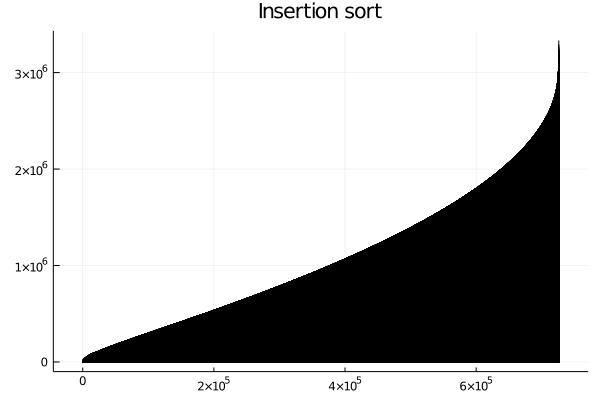

In [22]:
df = DataFrame(ordenado_insertion_sort)
plot(
        [1:1:size(df, 1);],
        df[!, 4],
        seriestype = :bar,
        label = false,
        title = "Insertion sort",
        fmt = :png
    )

### Escrita da saída em arquivo

In [ ]:
Saida.escreve_arquivo_saida(
    "Dados/Saida/saida_insertion_sort.txt",
    ordenado_insertion_sort,
    true,
)

# d) 
Apresentar a complexidade da função descrita no item anterior, fazendo uso de notação assintótica e tendo como parâmetros somente a quantidade n de meses e a quantidade m de fornecedores. (Data de entrega: 18/06) (0,5 ponto)


**Θ(m²n⁴)**, pois o número de linhas do arquivo é função do número de empresas (m) e do número de meses (n)

# e)
Implementar o método de ordenação Mergesort para ordenar o vetor de objetos do tipo contrato. Criar um clone do vetor e aplicar o método de ordenação, exibindo ao final o tempo total de execução da ordenação. (Data de entrega: 23/06) (1,0 ponto)


# f) 
Apresentar a complexidade da função descrita no item anterior, fazendo uso de notação assintótica e tendo como parâmetros somente a quantidade n de meses e a quantidade m de fornecedores. (Data de entrega: 23/06) (0,5 ponto)


# g)
Implementar o método de ordenação Heapsort para ordenar o vetor de objetos do tipo contrato. Criar um clone do vetor e aplicar o método de ordenação, exibindo ao final o tempo total de execução da ordenação. (Data de entrega: 23/06) (1,0 ponto)


# h)
Apresentar a complexidade da função descrita no item anterior, fazendo uso de notação assintótica e tendo como parâmetros somente a quantidade n de meses e a quantidade m de fornecedores. (Data de entrega: 23/06) (0,5 ponto)


# i)
Implementar o método de ordenação Quicksort para ordenar o vetor de objetos do tipo contrato. Criar um clone do vetor e aplicar o método de ordenação, exibindo ao final o tempo total de execução da ordenação. (Data de entrega: 23/06) (1,0 ponto)


# j)
Apresentar a complexidade da função descrita no item anterior, fazendo uso de notação assintótica e tendo como parâmetros somente a quantidade n de meses e a quantidade m de fornecedores. (Data de entrega: 23/06) (0,5 ponto)


# k)
Baseando-se nas ideias dos algoritmos apresentados, criar um método de ordenação que, entretanto, explore as regras de formação de preços de contratos de um fornecedor (expressas na matriz de contratos), para realizar a ordenação dos contratos pelo valor, exibindo ao final o tempo total de execução da ordenação. (Data de entrega: 25/06) (2,0 pontos)


Foi desenvolvida uma solução que reposiciona os índices da lista de vetores que representam os contratos de modo que todos os contratos de duração semelhantes sejam agrupados.

In [15]:
tempo_organizacao_indices = @time begin indices_ordenados = Ordenacao_Estrutural.organizar_indices(n, m); end
entrada_vetorial_pre_organizada = entrada_vetorizada[indices_ordenados];

 69.340237 seconds (468.31 k allocations: 43.207 GiB, 15.17% gc time)


### Gráfico do arquivo organizado pelo índice

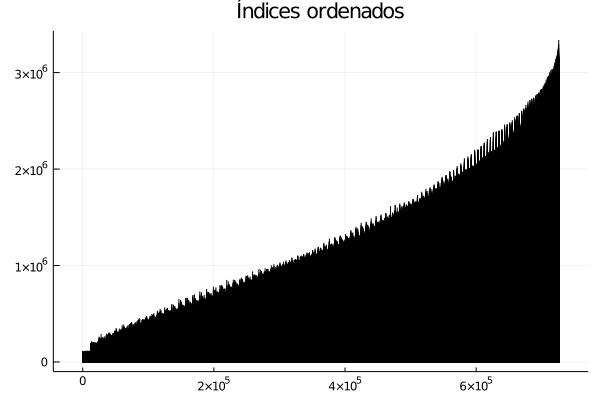

In [16]:
df = DataFrame(entrada_vetorial_pre_organizada)
plot(
        [1:1:size(df, 1);],
        df[!, 4],
        seriestype = :bar,
        label = false,
        title = "Índices ordenados",
        fmt = :png
    )

# l)
Apresentar a complexidade da função descrita no item anterior, fazendo uso de notação assintótica e tendo como parâmetros somente a quantidade n de meses e a quantidade m de fornecedores. (Data de entrega: 25/06) (1,0 ponto)


**Θ(mn)**